# Environment Set-up

```bash
mamba create -n project-health python=3.11 jupyterlab -c conda-forge
mamba activate project-health  # activate our environment
jupyter lab               # this will start up jupyter lab and open a browser
```

# pre-install

In [1]:
!mamba install -c conda-forge -y matplotlib
!mamba install -y pandas
!mamba install -y numpy
!mamba install -c anaconda -y scikit-learn
!mamba install -c conda-forge -y kneed
!mamba install -c conda-forge -y seaborn
!mamba install -c conda-forge -y scikit-learn-extra


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['matplotlib']

error    libmamba Could not open lockfile '/opt/mambaforge/pkgs/cache/cache.lock'
er

In [ ]:
  def jaccard_similarity(set_a, set_b):
    """Compute the Jaccard Similarity between two sets."""
    intersection = len(set_a.intersection(set_b))
    union = len(set_a.union(set_b))
    return intersection / union if union != 0 else 0.0

In [ ]:
from sklearn.metrics import precision_score, recall_score

def f_beta_score(P, R, beta=1.0):
    """
    Compute the F_beta score.

    Parameters:
    - P (float): Precision
    - R (float): Recall
    - beta (float): Weighting factor

    Returns:
    - float: F_beta score
    """
    if P + R == 0:
        return 0.0  # Handle edge case to avoid division by zero
    return (1 + beta**2) * P * R / (beta**2 * P + R)

def compute_f_beta_from_labels(true_labels, predicted_labels, beta=1.0):
    """
    Compute the F_beta score from true and predicted labels.

    Parameters:
    - true_labels (list): Ground truth labels
    - predicted_labels (list): Predicted labels from clustering or classification
    - beta (float): Weighting factor

    Returns:
    - float: F_beta score
    """
    P = precision_score(true_labels, predicted_labels, average='macro')
    R = recall_score(true_labels, predicted_labels, average='macro')
    return f_beta_score(P, R, beta)

# Example usage:
true_labels = [1, 0, 1, 2, 2, 0]
predicted_labels = [1, 1, 1, 2, 0, 0]
beta = 2

print(compute_f_beta_from_labels(true_labels, predicted_labels, beta))

# read data

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

In [121]:
import os

In [139]:
# Directory where the CSV files are located
directory = "./data/"

# Create an empty DataFrame to store the combined data
data = pd.DataFrame()
project_ID = 1
# Iterate over each file in the directory
for file in os.listdir(directory):
    if file.endswith(".csv"):
        # Construct full file path
        file_path = os.path.join(directory, file)
        
        # Read the CSV file and append it to the combined DataFrame
        inputData = pd.read_csv(file_path)
        # Adding an ID column with incremental values starting from 1
        inputData['ID'] = range(1, 1 + len(inputData))
        inputData['project_ID'] = project_ID
        project_ID = project_ID + 1
        # Concatenate the DataFrames
        data = pd.concat([data, inputData], ignore_index=True)



In [140]:
data

,dates,monthly_commits,monthly_contributors,monthly_open_PRs,monthly_closed_PRs,monthly_merged_PRs,monthly_PR_mergers,monthly_PR_comments,monthly_open_issues,monthly_closed_issues,monthly_issue_comments,monthly_stargazer,monthly_forks,monthly_watchers,ID,project_ID
0,2016-01-01,9,1,2,0,2,1,0,0,5,3,20,7,0,1,1
1,2016-02-01,10,1,2,0,2,1,0,0,3,5,6,3,2,2,1
2,2016-03-01,2,2,1,0,1,1,0,0,2,2,18,4,1,3,1
3,2016-04-01,0,0,0,0,0,0,0,0,0,0,30,6,0,4,1
4,2016-05-01,0,0,0,0,0,0,0,0,0,0,16,6,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78440,2019-01-01,0,0,0,0,0,0,0,0,0,0,18,2,0,49,1628
78441,2019-02-01,0,0,0,0,0,0,0,0,0,0,9,1,0,50,1628
78442,2019-03-01,0,0,0,0,0,0,0,0,0,0,15,3,1,51,1628
78443,2019-04-01,0,0,0,0,0,0,0,0,0,0,12,2,0,52,1628


In [204]:
data = pd.read_csv("./data/project0000.csv")
# Adding an ID column with incremental values starting from 1
data['ID'] = range(1, 1 + len(data))

In [205]:
type(data)

pandas.core.frame.DataFrame

In [206]:
data.head()

,dates,monthly_commits,monthly_contributors,monthly_open_PRs,monthly_closed_PRs,monthly_merged_PRs,monthly_PR_mergers,monthly_PR_comments,monthly_open_issues,monthly_closed_issues,monthly_issue_comments,monthly_stargazer,monthly_forks,monthly_watchers,ID
0,2016-12-01,123,1,0,0,0,0,0,10,23,23,0,0,0,1
1,2017-01-01,52,1,0,0,0,0,0,2,3,0,0,0,0,2
2,2017-02-01,40,1,0,0,0,0,0,1,5,0,0,0,0,3
3,2017-03-01,7,1,0,0,0,0,0,0,0,0,0,0,2,4
4,2017-04-01,1,1,0,0,0,0,0,0,0,0,0,0,3,5


Converting date/time strings to datetime objects
To efficiently work with time series, we need to convert date or time strings to datetime objects using the pandas.to_datetime function:

In [207]:
data['dates'] = pd.to_datetime(data['dates'])
print(data['dates'].dtypes)

datetime64[ns]


Setting a datetime column as a dataframe index
Now, let's set the Date column as a dataframe index using the set_index method:

In [208]:
data = data.set_index('dates')
data.head()

,monthly_commits,monthly_contributors,monthly_open_PRs,monthly_closed_PRs,monthly_merged_PRs,monthly_PR_mergers,monthly_PR_comments,monthly_open_issues,monthly_closed_issues,monthly_issue_comments,monthly_stargazer,monthly_forks,monthly_watchers,ID
dates,,,,,,,,,,,,,,
2016-12-01,123,1,0,0,0,0,0,10,23,23,0,0,0,1
2017-01-01,52,1,0,0,0,0,0,2,3,0,0,0,0,2
2017-02-01,40,1,0,0,0,0,0,1,5,0,0,0,0,3
2017-03-01,7,1,0,0,0,0,0,0,0,0,0,0,2,4
2017-04-01,1,1,0,0,0,0,0,0,0,0,0,0,3,5


There are 13 features
'monthly_commits', 'monthly_contributors', 'monthly_open_PRs', 'monthly_closed_PRs', 'monthly_merged_PRs', 'monthly_PR_mergers', 'monthly_PR_comments', 'monthly_open_issues', 'monthly_closed_issues', 'monthly_issue_comments', 'monthly_stargazer', 'monthly_forks', 'monthly_watchers'

+ Category 1 (project activity): 'monthly_commits', 'monthly_contributors','monthly_stargazer', 'monthly_forks', 'monthly_watchers'
+ Category 2 (PRs): 'monthly_open_PRs', 'monthly_closed_PRs', 'monthly_merged_PRs', 'monthly_PR_mergers', 'monthly_PR_comments'
+ Category 3 (issues): 'monthly_open_issues', 'monthly_closed_issues', 'monthly_issue_comments'

In [209]:
# Add project activity and store the result in a new column
data['activity'] = data['monthly_commits'] + data['monthly_contributors'] + data['monthly_stargazer'] + data['monthly_forks'] + data['monthly_watchers']
data.head()

,monthly_commits,monthly_contributors,monthly_open_PRs,monthly_closed_PRs,monthly_merged_PRs,monthly_PR_mergers,monthly_PR_comments,monthly_open_issues,monthly_closed_issues,monthly_issue_comments,monthly_stargazer,monthly_forks,monthly_watchers,ID,activity
dates,,,,,,,,,,,,,,,
2016-12-01,123,1,0,0,0,0,0,10,23,23,0,0,0,1,124
2017-01-01,52,1,0,0,0,0,0,2,3,0,0,0,0,2,53
2017-02-01,40,1,0,0,0,0,0,1,5,0,0,0,0,3,41
2017-03-01,7,1,0,0,0,0,0,0,0,0,0,0,2,4,10
2017-04-01,1,1,0,0,0,0,0,0,0,0,0,0,3,5,5


In [210]:
# Add PRs and store the result in a new column
data['PRs'] = data['monthly_open_PRs'] + data['monthly_closed_PRs'] + data['monthly_merged_PRs'] + data['monthly_PR_mergers'] + data['monthly_PR_comments']
data.head()

,monthly_commits,monthly_contributors,monthly_open_PRs,monthly_closed_PRs,monthly_merged_PRs,monthly_PR_mergers,monthly_PR_comments,monthly_open_issues,monthly_closed_issues,monthly_issue_comments,monthly_stargazer,monthly_forks,monthly_watchers,ID,activity,PRs
dates,,,,,,,,,,,,,,,,
2016-12-01,123,1,0,0,0,0,0,10,23,23,0,0,0,1,124,0
2017-01-01,52,1,0,0,0,0,0,2,3,0,0,0,0,2,53,0
2017-02-01,40,1,0,0,0,0,0,1,5,0,0,0,0,3,41,0
2017-03-01,7,1,0,0,0,0,0,0,0,0,0,0,2,4,10,0
2017-04-01,1,1,0,0,0,0,0,0,0,0,0,0,3,5,5,0


In [211]:
# Add PRs and store the result in a new column
data['issues'] = data['monthly_open_issues'] + data['monthly_closed_issues'] + data['monthly_issue_comments']
data.head()

,monthly_commits,monthly_contributors,monthly_open_PRs,monthly_closed_PRs,monthly_merged_PRs,monthly_PR_mergers,monthly_PR_comments,monthly_open_issues,monthly_closed_issues,monthly_issue_comments,monthly_stargazer,monthly_forks,monthly_watchers,ID,activity,PRs,issues
dates,,,,,,,,,,,,,,,,,
2016-12-01,123,1,0,0,0,0,0,10,23,23,0,0,0,1,124,0,56
2017-01-01,52,1,0,0,0,0,0,2,3,0,0,0,0,2,53,0,5
2017-02-01,40,1,0,0,0,0,0,1,5,0,0,0,0,3,41,0,6
2017-03-01,7,1,0,0,0,0,0,0,0,0,0,0,2,4,10,0,0
2017-04-01,1,1,0,0,0,0,0,0,0,0,0,0,3,5,5,0,0


# data visualization

Creating a basic single-line matplotlib time series plot
To create a basic time series line plot, we use the standard matplotlib.pyplot.plot(x, y) method:

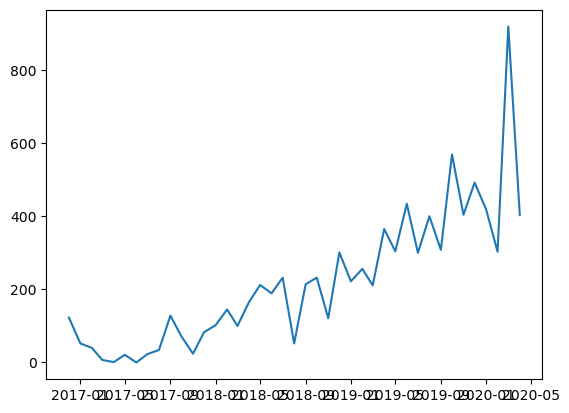

In [212]:
plt.plot(data.index, data['monthly_commits'])

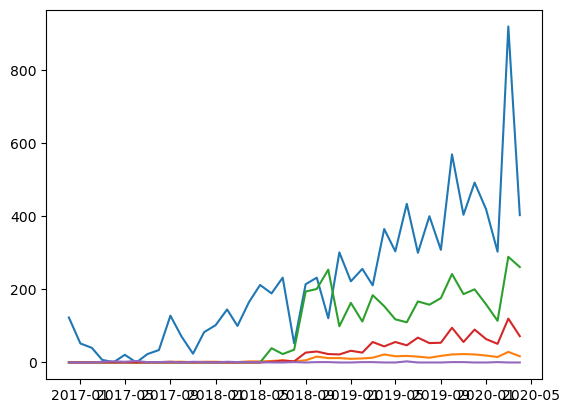

In [213]:
for col in ['monthly_commits', 'monthly_contributors','monthly_stargazer', 'monthly_forks', 'monthly_watchers']:
    plt.plot(data.index, data[col])

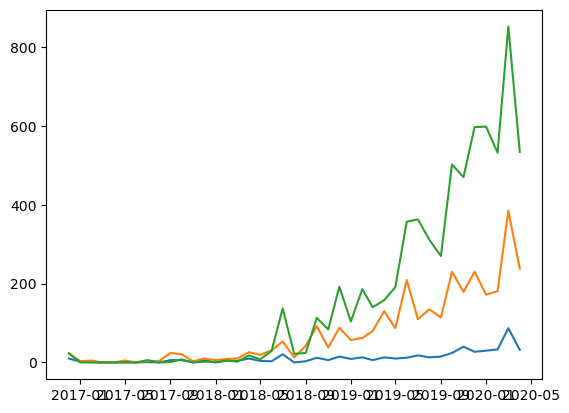

In [214]:
for col in ['monthly_open_issues', 'monthly_closed_issues', 'monthly_issue_comments']:
    plt.plot(data.index, data[col])

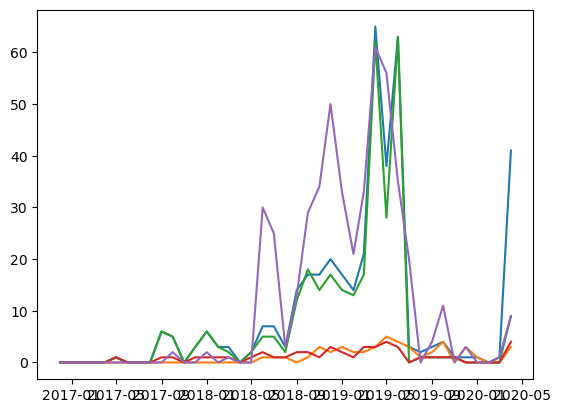

In [215]:
for col in ['monthly_open_PRs', 'monthly_closed_PRs', 'monthly_merged_PRs', 'monthly_PR_mergers', 'monthly_PR_comments']:
    plt.plot(data.index, data[col])

# Random Projection

In [216]:
import random
import numpy as np
import math
import os
import pandas as pd
import time
#from scipy.io import arff

In [217]:
def cluster(candidates, enough, res):
    if len(candidates) < enough:
        res.append(candidates)
        return res

    east, west, east_items, west_items = split(candidates)
    res = cluster(east_items, enough, res)
    res = cluster(west_items, enough, res)

    return res


def split(candidates):
    pivot = random.choice(candidates)
    east_pivot = find_farest(pivot, candidates)
    west_pivot = find_farest(east_pivot, candidates)
    c = cal_distance(east_pivot, west_pivot)

    if c == 0:
        east_items = candidates[:len(candidates)//2]
        west_items = candidates[len(candidates)//2:]
        return east_pivot, west_pivot, east_items, west_items

    all_distance = []
    for candidate in candidates:
        a = cal_distance(candidate, west_pivot)
        b = cal_distance(candidate, east_pivot)
        d = (a ** 2 + c ** 2 - b ** 2) / (2 * c)
        all_distance.append((d, candidate))

    all_distance.sort(key=lambda x: x[0])
    sorted_candidates = [item[1] for item in all_distance]
    east_items = sorted_candidates[:len(sorted_candidates)//2]
    west_items = sorted_candidates[len(sorted_candidates)//2:]

    return east_pivot, west_pivot, east_items, west_items


def find_farest(pivot, candidates):
    max_d = 0
    most_point = pivot

    for candidate in candidates:
        cur_d = cal_distance(pivot, candidate)
        if  cur_d > max_d:
            max_d = cur_d
            most_point = candidate
    
    return most_point


def cal_distance(p1, p2):
    return math.sqrt(sum([(v1 - v2) ** 2 for v1, v2 in zip(p1[:-1], p2[:-1])]))


In [218]:
class random_projection:
    def __init__(self, data, stop_depth):
        self.data = data.to_numpy()
        self.stop_depth = stop_depth
        self.res = cluster(self.data, self.stop_depth, [])
        #print (self.res)
        self.NumOfCluster = self.setNumOfCluster()
        #print (self.NumOfCluster)
        self.labels = np.ones(data.shape[0])
        self.setLabels()
        #print("Array of ones:", self.labels)

    def setLabels(self):
        for m in range(self.NumOfCluster):
            #print(m)
            for n in range(len(res[m])):
                row = getMatchedRowsIndices(self.res[m][n], self.data)
                #print (row)
                self.labels[row] = m
                
    def getLabels(self):
        return self.labels
        
    def getNumOfCluster(self):
        return self.NumOfCluster
        
    def setNumOfCluster(self):
        return len(self.res)
        
    def getMatchedRowsIndices(target_row, array):
        # Make sure the target row has the right shape
        if target_row.shape[0] != array.shape[1]:
            print("The target row does not have the same number of elements as the array rows.")
        else:
            # Compare each row in the array with the target row
            matches = np.all(array == target_row, axis=1)
    
            # Use np.where to find the indices of matches
            row_indices = np.where(matches)[0]
    
            return row_indices
    

## Activity

In [ ]:
activity_columns = data[['monthly_commits', 'monthly_contributors','monthly_stargazer', 'monthly_forks', 'monthly_watchers']]

In [245]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(activity_columns)

# Applying PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Creating a DataFrame for the principal components
pca_activity = pd.DataFrame(data=principal_components, columns=['PCA1', 'PCA2'])

print(pca_activity.head())

# Explained variance
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance: {explained_variance}")

       PCA1      PCA2
0 -1.455033 -1.205118
1 -2.002457 -1.250298
2 -2.030620 -1.255746
3 -2.540435  0.701573
4 -2.770700  1.684998
Explained Variance: [0.77517395 0.13900936]


In [241]:
activity = random_projection(activity_columns, 17)
activity_labels = activity.getLabels()

# Check if the length of the ndarray matches the number of rows in the DataFrame
if len(activity_labels) == len(activity_columns):
    # Adding the new column
    activity_columns['activity_labels'] = activity_labels
else:
    print("The length of the ndarray does not match the number of DataFrame rows.")

# Convert 'my_column' to int
activity_columns['activity_labels'] = activity_columns['activity_labels'].astype(int)

/tmp/ipykernel_2737/3395794369.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activity_columns['activity_labels'] = activity_labels
/tmp/ipykernel_2737/3395794369.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activity_columns['activity_labels'] = activity_columns['activity_labels'].astype(int)


In [242]:
activity_columns

,monthly_commits,monthly_contributors,monthly_stargazer,monthly_forks,monthly_watchers,activity_labels
dates,,,,,,
2016-12-01,123,1,0,0,0,1
2017-01-01,52,1,0,0,0,0
2017-02-01,40,1,0,0,0,0
2017-03-01,7,1,0,0,2,0
2017-04-01,1,1,0,0,3,0
2017-05-01,21,1,0,0,2,0
2017-06-01,0,0,0,0,4,0
2017-07-01,23,1,0,0,1,0
2017-08-01,34,1,0,0,1,0


In [200]:
# Check if the length of the ndarray matches the number of rows in the DataFrame
if len(activity_labels) == len(data):
    # Adding the new column
    data['activity_random_projection_labels'] = activity_labels
else:
    print("The length of the ndarray does not match the number of DataFrame rows.")
# Convert 'my_column' to int
data['activity_random_projection_labels'] = data['activity_random_projection_labels'].astype(int)

## issues

In [ ]:
issues_columns = data[[ 'monthly_open_issues', 'monthly_closed_issues', 'monthly_issue_comments']]

In [246]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(issues_columns)

# Applying PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Creating a DataFrame for the principal components
pca_issues = pd.DataFrame(data=principal_components, columns=['PCA1', 'PCA2'])

print(pca_issues.head())

# Explained variance
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance: {explained_variance}")

       PCA1      PCA2
0 -1.350985  0.917768
1 -1.369184 -0.119484
2 -1.388376 -0.154517
3 -1.449322 -0.195986
4 -1.449322 -0.195986
Explained Variance: [0.87230572 0.09987434]


In [234]:

issues = random_projection(issues_columns, 17)
issues_labels = issues.getLabels()

# Check if the length of the ndarray matches the number of rows in the DataFrame
if len(issues_labels) == len(issues_columns):
    # Adding the new column
    issues_columns['issues_labels'] = issues_labels
else:
    print("The length of the ndarray does not match the number of DataFrame rows.")

# Convert 'my_column' to int
issues_columns['issues_labels'] = issues_columns['issues_labels'].astype(int)

/tmp/ipykernel_2737/646987311.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  issues_columns['issues_labels'] = issues_labels
/tmp/ipykernel_2737/646987311.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  issues_columns['issues_labels'] = issues_columns['issues_labels'].astype(int)


In [235]:
issues_columns

,monthly_open_issues,monthly_closed_issues,monthly_issue_comments,issues_labels
dates,,,,
2016-12-01,10,23,23,0
2017-01-01,2,3,0,1
2017-02-01,1,5,0,1
2017-03-01,0,0,0,1
2017-04-01,0,0,0,1
2017-05-01,0,5,1,1
2017-06-01,0,0,0,1
2017-07-01,1,4,6,1
2017-08-01,0,3,0,1


## PRs

In [ ]:
PRs_columns = data[['monthly_open_PRs', 'monthly_closed_PRs', 'monthly_merged_PRs', 'monthly_PR_mergers', 'monthly_PR_comments']]

In [247]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(PRs_columns)

# Applying PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Creating a DataFrame for the principal components
pca_PRs = pd.DataFrame(data=principal_components, columns=['PCA1', 'PCA2'])

print(pca_PRs.head())

# Explained variance
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance: {explained_variance}")

       PCA1      PCA2
0 -1.814295 -0.040847
1 -1.814295 -0.040847
2 -1.814295 -0.040847
3 -1.814295 -0.040847
4 -1.814295 -0.040847
Explained Variance: [0.77642183 0.08342154]


In [237]:

PRs = random_projection(PRs_columns, 17)
PRs_labels = PRs.getLabels()

# Check if the length of the ndarray matches the number of rows in the DataFrame
if len(PRs_labels) == len(PRs_columns):
    # Adding the new column
    PRs_columns['PRs_labels'] = PRs_labels
else:
    print("The length of the ndarray does not match the number of DataFrame rows.")

# Convert 'my_column' to int
PRs_columns['PRs_labels'] = PRs_columns['PRs_labels'].astype(int)

/tmp/ipykernel_2737/537043119.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PRs_columns['PRs_labels'] = PRs_labels
/tmp/ipykernel_2737/537043119.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PRs_columns['PRs_labels'] = PRs_columns['PRs_labels'].astype(int)


In [238]:
PRs_columns

,monthly_open_PRs,monthly_closed_PRs,monthly_merged_PRs,monthly_PR_mergers,monthly_PR_comments,PRs_labels
dates,,,,,,
2016-12-01,0,0,0,0,0,1
2017-01-01,0,0,0,0,0,1
2017-02-01,0,0,0,0,0,1
2017-03-01,0,0,0,0,0,1
2017-04-01,0,0,0,0,0,1
2017-05-01,1,0,1,1,0,1
2017-06-01,0,0,0,0,0,1
2017-07-01,0,0,0,0,0,1
2017-08-01,0,0,0,0,0,1


In [236]:
similarity = jaccard_similarity(set(activity_columns["activity_labels"]), set(issues_columns["issues_labels"]))
print(f"Jaccard Similarity: {similarity}")

Jaccard Similarity: 1.0


In [239]:
similarity = jaccard_similarity(set(activity_columns["activity_labels"]), set(PRs_columns["PRs_labels"]))
print(f"Jaccard Similarity: {similarity}")

Jaccard Similarity: 0.75


In [240]:
similarity = jaccard_similarity(set(PRs_columns["PRs_labels"]), set(issues_columns["issues_labels"]))
print(f"Jaccard Similarity: {similarity}")

Jaccard Similarity: 0.75


# K-means

In [250]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def kmeans(data):
    feature_labels = 'k-means_labels'
    
    df = pd.DataFrame(data, columns=['PCA1', 'PCA2'])

    # Number of clusters
    k = 4

    # Create and fit KMeans model
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)

    # Get cluster labels and centers
    labels = kmeans.labels_
    cluster_centers = kmeans.cluster_centers_

    # Visualize the clusters
    plt.scatter(df['PCA1'], df['PCA2'], c=labels, cmap='viridis')
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=200)
    plt.show()

    # add labels as new column
    data[feature_labels] = labels

/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


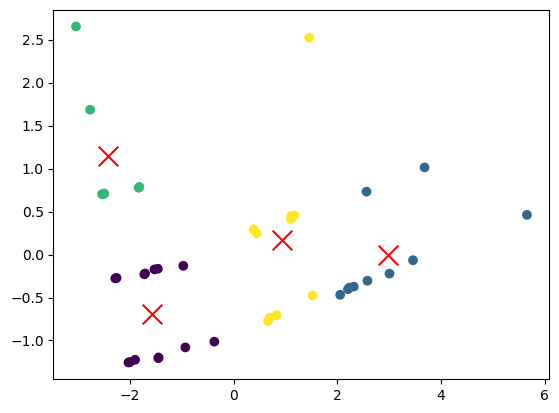

In [251]:
kmeans(pca_activity)

In [252]:
pca_activity

,PCA1,PCA2,k-means_labels
0,-1.455033,-1.205118,0
1,-2.002457,-1.250298,0
2,-2.030620,-1.255746,0
3,-2.540435,0.701573,2
4,-2.770700,1.684998,2
5,-2.507578,0.707928,2
6,-3.043426,2.653379,2
7,-2.286701,-0.277313,0
8,-2.260885,-0.272320,0
9,-1.821468,0.786765,2


/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


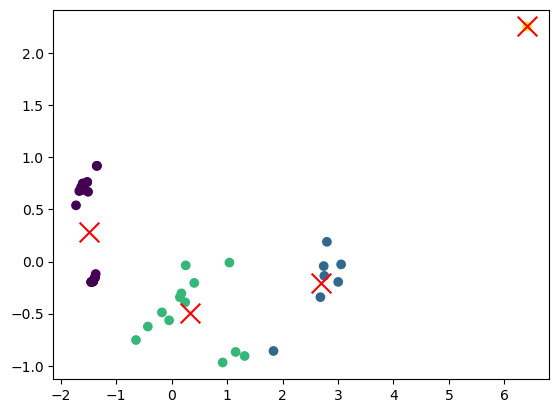

In [253]:
kmeans(pca_issues)

In [254]:
pca_issues

,PCA1,PCA2,k-means_labels
0,-1.350985,0.917768,0
1,-1.369184,-0.119484,0
2,-1.388376,-0.154517,0
3,-1.449322,-0.195986,0
4,-1.449322,-0.195986,0
5,-1.417103,-0.191013,0
6,-1.449322,-0.195986,0
7,-1.379967,-0.153182,0
8,-1.431428,-0.193227,0
9,-1.522214,0.762935,0


/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


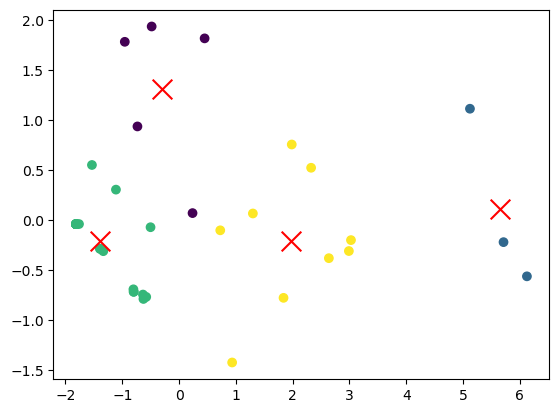

In [255]:
kmeans(pca_PRs)

In [256]:
pca_PRs

,PCA1,PCA2,k-means_labels
0,-1.814295,-0.040847,2
1,-1.814295,-0.040847,2
2,-1.814295,-0.040847,2
3,-1.814295,-0.040847,2
4,-1.814295,-0.040847,2
5,-1.391686,-0.287791,2
6,-1.814295,-0.040847,2
7,-1.814295,-0.040847,2
8,-1.814295,-0.040847,2
9,-0.627475,-0.790390,2


In [275]:
similarity = jaccard_similarity(set(pca_issues["k-means_labels"]), set(pca_PRs["k-means_labels"]))
print(f"Jaccard Similarity: {similarity}")

similarity = jaccard_similarity(set(pca_activity["k-means_labels"]), set(pca_PRs["k-means_labels"]))
print(f"Jaccard Similarity: {similarity}")

similarity = jaccard_similarity(set(pca_activity["k-means_labels"]), set(pca_issues["k-means_labels"]))
print(f"Jaccard Similarity: {similarity}")

Jaccard Similarity: 1.0
Jaccard Similarity: 1.0
Jaccard Similarity: 1.0


# KMedoids

In [260]:
KMedoids_data = pca_activity[['PCA1', 'PCA2']]

In [261]:
KMedoids_data

,PCA1,PCA2
0,-1.455033,-1.205118
1,-2.002457,-1.250298
2,-2.030620,-1.255746
3,-2.540435,0.701573
4,-2.770700,1.684998
5,-2.507578,0.707928
6,-3.043426,2.653379
7,-2.286701,-0.277313
8,-2.260885,-0.272320
9,-1.821468,0.786765


In [262]:
from sklearn_extra.cluster import KMedoids
import numpy as np

# Initialize the K-Medoids model with the number of clusters (k) and other parameters
k = 4
kmedoids = KMedoids(n_clusters=k, random_state=0)

# Fit the model to your data
kmedoids.fit(KMedoids_data)

# Get the cluster medoids and labels
medoids = kmedoids.medoid_indices_
labels = kmedoids.labels_

print("Cluster Medoids:", medoids)
print("Cluster Labels:", labels)

Cluster Medoids: [37 13 22 11]
Cluster Labels: [1 1 1 3 3 3 3 3 3 3 1 3 1 1 3 1 1 1 1 1 1 2 2 2 2 2 2 2 0 2 2 0 0 0 0 0 0
 0 2 0 0]


In [264]:
# add labels as new column
pca_activity['KMedoids_labels'] = labels

In [265]:
pca_activity

,PCA1,PCA2,k-means_labels,KMedoids_labels
0,-1.455033,-1.205118,0,1
1,-2.002457,-1.250298,0,1
2,-2.030620,-1.255746,0,1
3,-2.540435,0.701573,2,3
4,-2.770700,1.684998,2,3
5,-2.507578,0.707928,2,3
6,-3.043426,2.653379,2,3
7,-2.286701,-0.277313,0,3
8,-2.260885,-0.272320,0,3
9,-1.821468,0.786765,2,3


In [266]:
KMedoids_data = pca_issues[['PCA1', 'PCA2']]

In [267]:
KMedoids_data

,PCA1,PCA2
0,-1.350985,0.917768
1,-1.369184,-0.119484
2,-1.388376,-0.154517
3,-1.449322,-0.195986
4,-1.449322,-0.195986
5,-1.417103,-0.191013
6,-1.449322,-0.195986
7,-1.379967,-0.153182
8,-1.431428,-0.193227
9,-1.522214,0.762935


In [268]:
from sklearn_extra.cluster import KMedoids
import numpy as np

# Initialize the K-Medoids model with the number of clusters (k) and other parameters
k = 4
kmedoids = KMedoids(n_clusters=k, random_state=0)

# Fit the model to your data
kmedoids.fit(KMedoids_data)

# Get the cluster medoids and labels
medoids = kmedoids.medoid_indices_
labels = kmedoids.labels_

print("Cluster Medoids:", medoids)
print("Cluster Labels:", labels)

Cluster Medoids: [ 1 24 37 23]
Cluster Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 3 1 3 1 3 1 3 1 1 2 1 1 1 2 2 2
 2 2 2 2]


In [269]:
# add labels as new column
pca_issues['KMedoids_labels'] = labels

In [270]:
pca_issues

,PCA1,PCA2,k-means_labels,KMedoids_labels
0,-1.350985,0.917768,0,0
1,-1.369184,-0.119484,0,0
2,-1.388376,-0.154517,0,0
3,-1.449322,-0.195986,0,0
4,-1.449322,-0.195986,0,0
5,-1.417103,-0.191013,0,0
6,-1.449322,-0.195986,0,0
7,-1.379967,-0.153182,0,0
8,-1.431428,-0.193227,0,0
9,-1.522214,0.762935,0,0


In [271]:
KMedoids_data = pca_PRs[['PCA1', 'PCA2']]

In [272]:
from sklearn_extra.cluster import KMedoids
import numpy as np

# Initialize the K-Medoids model with the number of clusters (k) and other parameters
k = 4
kmedoids = KMedoids(n_clusters=k, random_state=0)

# Fit the model to your data
kmedoids.fit(KMedoids_data)

# Get the cluster medoids and labels
medoids = kmedoids.medoid_indices_
labels = kmedoids.labels_

print("Cluster Medoids:", medoids)
print("Cluster Labels:", labels)

Cluster Medoids: [24 10  1 35]
Cluster Labels: [2 2 2 2 2 3 2 2 2 1 1 2 1 1 1 1 2 3 1 1 1 1 0 0 0 0 0 0 0 0 0 2 3 3 1 3 2
 2 2 2 0]


In [273]:
# add labels as new column
pca_PRs['KMedoids_labels'] = labels

In [274]:
pca_PRs

,PCA1,PCA2,k-means_labels,KMedoids_labels
0,-1.814295,-0.040847,2,2
1,-1.814295,-0.040847,2,2
2,-1.814295,-0.040847,2,2
3,-1.814295,-0.040847,2,2
4,-1.814295,-0.040847,2,2
5,-1.391686,-0.287791,2,3
6,-1.814295,-0.040847,2,2
7,-1.814295,-0.040847,2,2
8,-1.814295,-0.040847,2,2
9,-0.627475,-0.790390,2,1


In [276]:
similarity = jaccard_similarity(set(pca_issues["KMedoids_labels"]), set(pca_PRs["KMedoids_labels"]))
print(f"Jaccard Similarity: {similarity}")

similarity = jaccard_similarity(set(pca_activity["KMedoids_labels"]), set(pca_PRs["KMedoids_labels"]))
print(f"Jaccard Similarity: {similarity}")

similarity = jaccard_similarity(set(pca_activity["KMedoids_labels"]), set(pca_issues["KMedoids_labels"]))
print(f"Jaccard Similarity: {similarity}")

Jaccard Similarity: 1.0
Jaccard Similarity: 1.0
Jaccard Similarity: 1.0


In [ ]:
from sklearn_extra.cluster import KMedoids
import numpy as np

# Create a sample dataset
data = np.array([[1, 2], [5, 8], [1, 5], [8, 8], [9, 10]])

# Initialize the K-Medoids model with the number of clusters (k) and other parameters
k = 2
kmedoids = KMedoids(n_clusters=k, random_state=0)

# Fit the model to your data
kmedoids.fit(data)

# Get the cluster medoids and labels
medoids = kmedoids.medoid_indices_
labels = kmedoids.labels_

print("Cluster Medoids:", medoids)
print("Cluster Labels:", labels)

In [123]:
feature = 'monthly_closed_issues'
feature_labels = feature + '_labels'
feature_labels

'monthly_closed_issues_labels'

In [125]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def kmeans(feature):
    feature_labels = feature + '_labels'
    
    df = pd.DataFrame(data, columns=['ID', feature])

    # Number of clusters
    k = 2

    # Create and fit KMeans model
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)

    # Get cluster labels and centers
    labels = kmeans.labels_
    cluster_centers = kmeans.cluster_centers_

    # Visualize the clusters
    plt.scatter(df['ID'], df[feature], c=labels, cmap='viridis')
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=200)
    plt.show()

    # add labels as new column
    data[feature_labels] = labels

/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


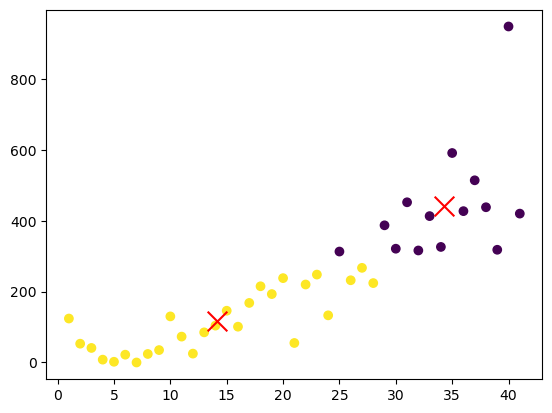

In [129]:
feature = 'activity'
kmeans(feature)

/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


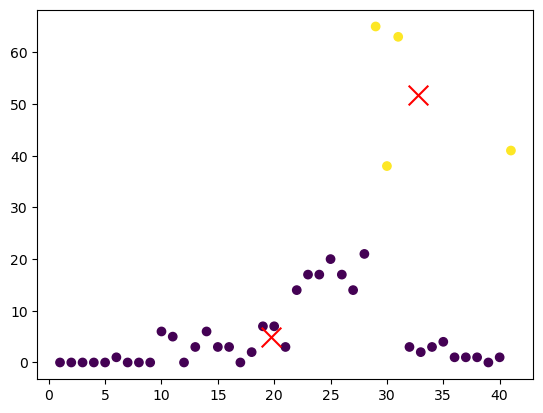

In [131]:
feature = 'monthly_open_PRs'
kmeans(feature)

/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


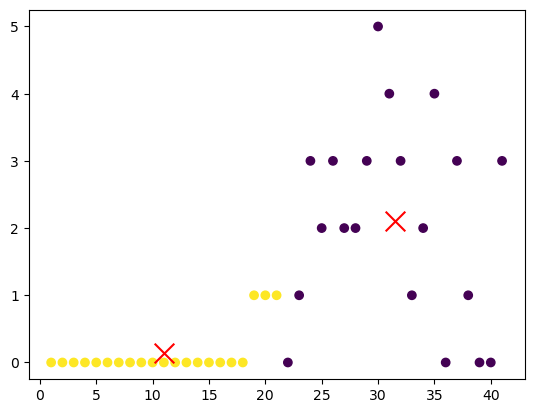

In [132]:
feature = 'monthly_closed_PRs'
kmeans(feature)

/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


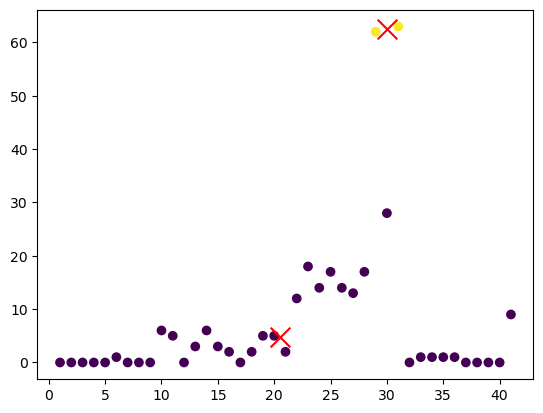

In [133]:
feature = 'monthly_merged_PRs'
kmeans(feature)

/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


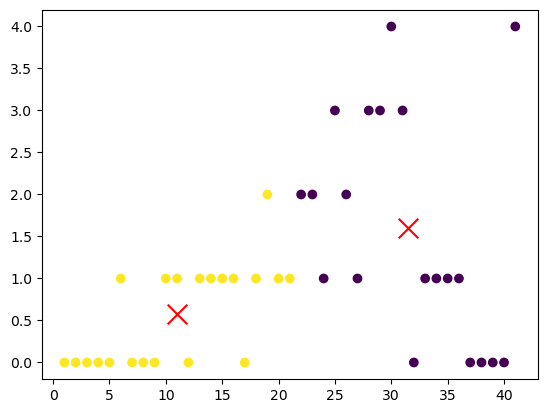

In [134]:
feature = 'monthly_PR_mergers'
kmeans(feature)

/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


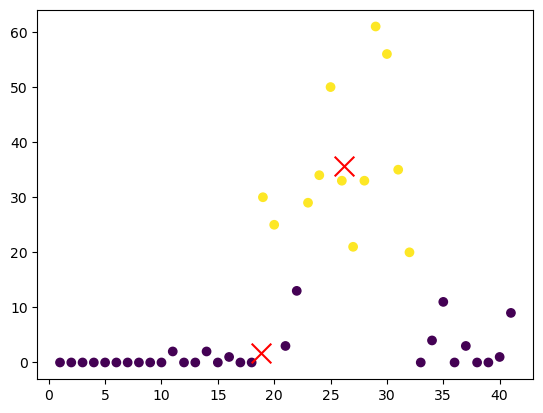

In [135]:
feature = 'monthly_PR_comments'
kmeans(feature)

/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


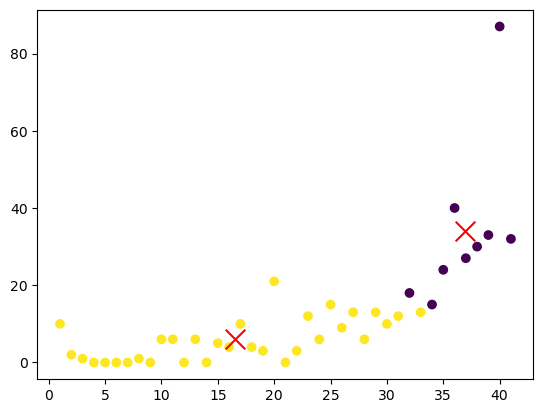

In [136]:
feature = 'monthly_open_issues'
kmeans(feature)

/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


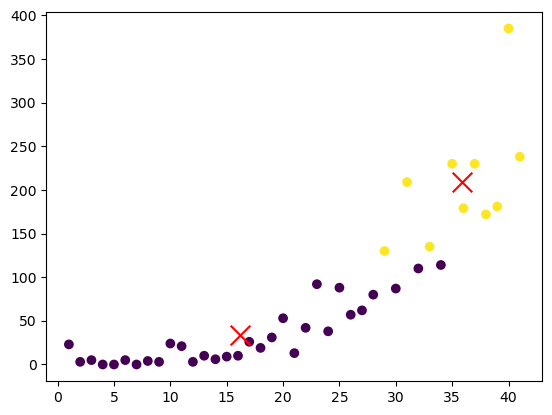

In [126]:
feature = 'monthly_closed_issues'
kmeans(feature)

/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


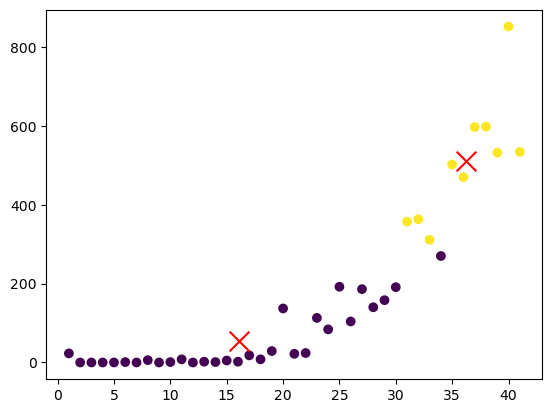

In [137]:
feature = 'monthly_issue_comments'
kmeans(feature)

/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


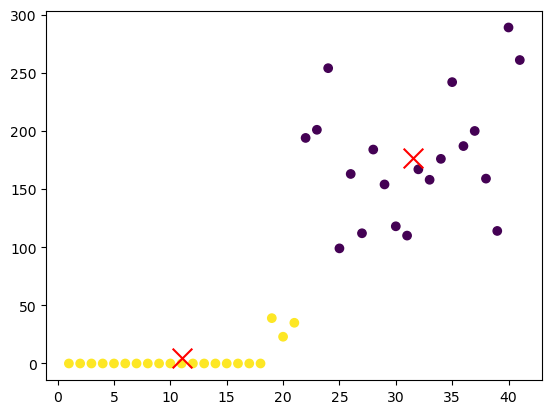

In [138]:
feature = 'monthly_stargazer'
kmeans(feature)

/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


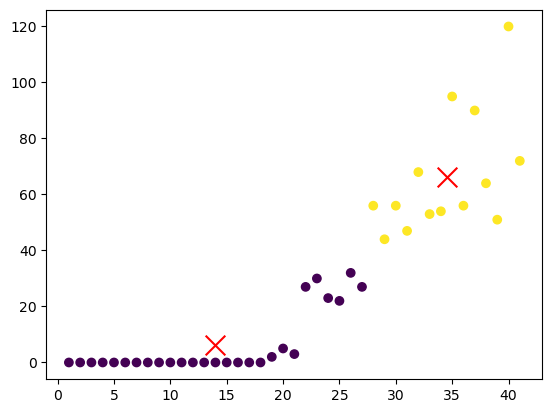

In [139]:
feature = 'monthly_forks'
kmeans(feature)

/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


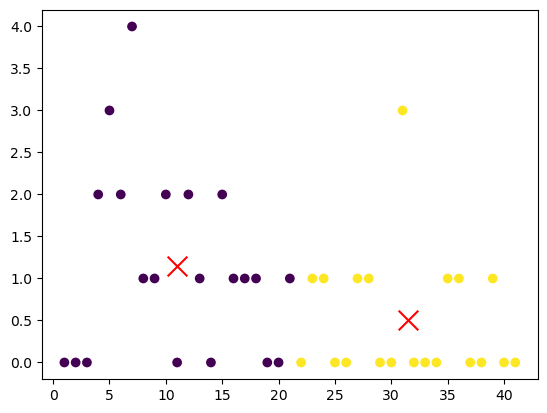

In [140]:
feature = 'monthly_watchers'
kmeans(feature)

In [141]:
data.head(3)

,monthly_commits,monthly_contributors,monthly_open_PRs,monthly_closed_PRs,monthly_merged_PRs,monthly_PR_mergers,monthly_PR_comments,monthly_open_issues,monthly_closed_issues,monthly_issue_comments,...,monthly_open_PRs_labels,monthly_closed_PRs_labels,monthly_merged_PRs_labels,monthly_PR_mergers_labels,monthly_PR_comments_labels,monthly_open_issues_labels,monthly_issue_comments_labels,monthly_stargazer_labels,monthly_forks_labels,monthly_watchers_labels
dates,,,,,,,,,,,,,,,,,,,,,
2016-12-01,123,1,0,0,0,0,0,10,23,23,...,0,1,0,1,0,1,0,1,0,0
2017-01-01,52,1,0,0,0,0,0,2,3,0,...,0,1,0,1,0,1,0,1,0,0
2017-02-01,40,1,0,0,0,0,0,1,5,0,...,0,1,0,1,0,1,0,1,0,0


# Check overlap

overlap is unhealth
monthly_open_PRs' 'monthly_closed_PRs'
result good

In [144]:
# Select and display only the desired columns
selected_columns = data[['monthly_open_PRs','monthly_open_PRs_labels', 'monthly_closed_PRs', 'monthly_closed_PRs_labels']]
selected_columns

,monthly_open_PRs,monthly_open_PRs_labels,monthly_closed_PRs,monthly_closed_PRs_labels
dates,,,,
2016-12-01,0,0,0,1
2017-01-01,0,0,0,1
2017-02-01,0,0,0,1
2017-03-01,0,0,0,1
2017-04-01,0,0,0,1
2017-05-01,1,0,0,1
2017-06-01,0,0,0,1
2017-07-01,0,0,0,1
2017-08-01,0,0,0,1


In [ ]:
overlap is unhealth
monthly_open_PRs' 'activity'
result not good

In [145]:
# Select and display only the desired columns
selected_columns = data[['monthly_open_PRs','monthly_open_PRs_labels', 'activity', 'activity_labels']]
selected_columns

,monthly_open_PRs,monthly_open_PRs_labels,activity,activity_labels
dates,,,,
2016-12-01,0,0,124,1
2017-01-01,0,0,53,1
2017-02-01,0,0,41,1
2017-03-01,0,0,8,1
2017-04-01,0,0,2,1
2017-05-01,1,0,22,1
2017-06-01,0,0,0,1
2017-07-01,0,0,24,1
2017-08-01,0,0,35,1


overlap is unhealth
monthly_closed_issues' 'monthly_closed_PRs'
result not good

In [143]:
# Select and display only the desired columns
selected_columns = data[['monthly_closed_issues','monthly_closed_issues_labels', 'monthly_closed_PRs', 'monthly_closed_PRs_labels']]
selected_columns

,monthly_closed_issues,monthly_closed_issues_labels,monthly_closed_PRs,monthly_closed_PRs_labels
dates,,,,
2016-12-01,23,0,0,1
2017-01-01,3,0,0,1
2017-02-01,5,0,0,1
2017-03-01,0,0,0,1
2017-04-01,0,0,0,1
2017-05-01,5,0,0,1
2017-06-01,0,0,0,1
2017-07-01,4,0,0,1
2017-08-01,3,0,0,1


'monthly_open_issues', 'monthly_closed_issues'

In [146]:
# Select and display only the desired columns
selected_columns = data[['monthly_open_issues','monthly_open_issues_labels', 'monthly_closed_issues', 'monthly_closed_issues_labels']]
selected_columns

,monthly_open_issues,monthly_open_issues_labels,monthly_closed_issues,monthly_closed_issues_labels
dates,,,,
2016-12-01,10,1,23,0
2017-01-01,2,1,3,0
2017-02-01,1,1,5,0
2017-03-01,0,1,0,0
2017-04-01,0,1,0,0
2017-05-01,0,1,5,0
2017-06-01,0,1,0,0
2017-07-01,1,1,4,0
2017-08-01,0,1,3,0


monthly_issue_comments
monthly_open_PRs

In [148]:
# Select and display only the desired columns
selected_columns = data[['monthly_issue_comments','monthly_issue_comments_labels', 'monthly_open_PRs', 'monthly_open_PRs_labels']]
selected_columns

,monthly_issue_comments,monthly_issue_comments_labels,monthly_open_PRs,monthly_open_PRs_labels
dates,,,,
2016-12-01,23,0,0,0
2017-01-01,0,0,0,0
2017-02-01,0,0,0,0
2017-03-01,0,0,0,0
2017-04-01,0,0,0,0
2017-05-01,1,0,1,0
2017-06-01,0,0,0,0
2017-07-01,6,0,0,0
2017-08-01,0,0,0,0


# KMedoids

In [151]:
from sklearn_extra.cluster import KMedoids
import numpy as np

# Create a sample dataset
data = np.array([[1, 2], [5, 8], [1, 5], [8, 8], [9, 10]])

# Initialize the K-Medoids model with the number of clusters (k) and other parameters
k = 2
kmedoids = KMedoids(n_clusters=k, random_state=0)

# Fit the model to your data
kmedoids.fit(data)

# Get the cluster medoids and labels
medoids = kmedoids.medoid_indices_
labels = kmedoids.labels_

print("Cluster Medoids:", medoids)
print("Cluster Labels:", labels)


Cluster Medoids: [2 3]
Cluster Labels: [0 1 0 1 1]


# BIRCH

Cluster Labels: [0 2 0 1 1]


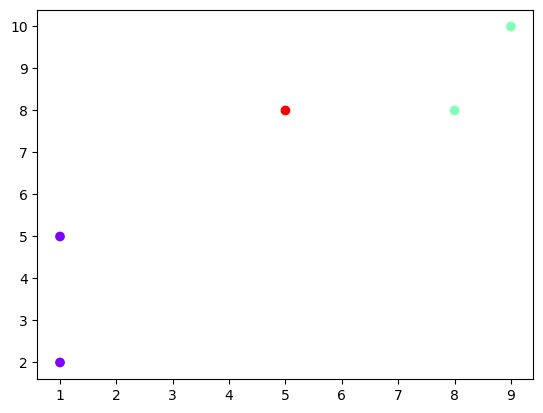

In [3]:
from sklearn.cluster import Birch
import numpy as np

# Create a sample dataset
data = np.array([[1, 2], [5, 8], [1, 5], [8, 8], [9, 10]])

# Create a BIRCH clustering model
birch = Birch(threshold=0.5, branching_factor=50)

# Fit the model to your data
birch.fit(data)

# Predict the clusters for your data points
labels = birch.predict(data)

# Access the cluster centers
cluster_centers = birch.subcluster_centers_

# Access the number of clusters found
n_clusters = birch.n_clusters

labels = birch.labels_
print("Cluster Labels:", labels)
# You can also use birch.fit_predict(data) to fit and predict in one step

# To visualize the clusters, you can use a plotting library like Matplotlib
import matplotlib.pyplot as plt

# Assuming data is a 2D array
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='rainbow')
plt.show()


/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/skle

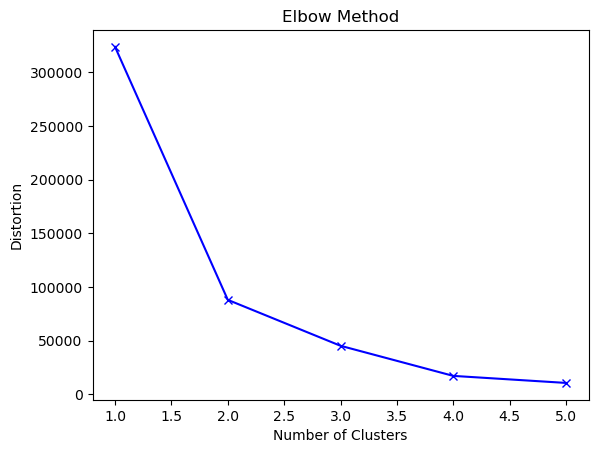

In [80]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

distortions = []
K = range(1, 6)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


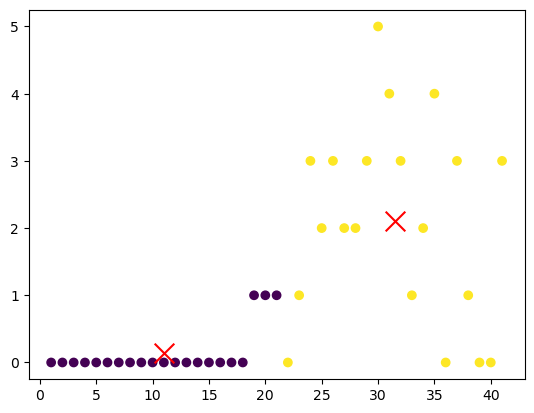

In [90]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Example data as a NumPy array
#data = np.array([[2, 3], [4, 6], [8, 8], [3, 2], [10, 11], [15, 13]])

# Convert the data to a Pandas DataFrame
#df = pd.DataFrame(data, columns=['monthly_open_issues', 'monthly_closed_issues'])
df = pd.DataFrame(data, columns=['ID', 'monthly_closed_PRs'])

# Number of clusters
k = 2

# Create and fit KMeans model
kmeans = KMeans(n_clusters=k)
kmeans.fit(df)

# Get cluster labels and centers
labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

# Visualize the clusters
plt.scatter(df['ID'], df['monthly_closed_PRs'], c=labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=200)
plt.show()

In [91]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [92]:
data['monthly_closed_PRs_labels'] = labels

In [93]:
print(data.head(3))

        dates  monthly_commits  monthly_contributors  monthly_open_PRs  \
0  2016-12-01              123                     1                 0   
1  2017-01-01               52                     1                 0   
2  2017-02-01               40                     1                 0   

   monthly_closed_PRs  monthly_merged_PRs  monthly_PR_mergers  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   

   monthly_PR_comments  monthly_open_issues  monthly_closed_issues  \
0                    0                   10                     23   
1                    0                    2                      3   
2                    0                    1                      5   

   monthly_issue_comments  monthly_stargazer  monthly_forks  monthly_watchers  \
0                      23                  0              0                 0   

In [95]:
# Select and display only the desired columns
selected_columns = data[['monthly_closed_issues','monthly_closed_issues_labels', 'monthly_closed_PRs', 'monthly_closed_PRs_labels']]
print(selected_columns)

    monthly_closed_issues  monthly_closed_issues_labels  monthly_closed_PRs  \
0                      23                             1                   0   
1                       3                             1                   0   
2                       5                             1                   0   
3                       0                             1                   0   
4                       0                             1                   0   
5                       5                             1                   0   
6                       0                             1                   0   
7                       4                             1                   0   
8                       3                             1                   0   
9                      24                             1                   0   
10                     21                             1                   0   
11                      3                           

/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


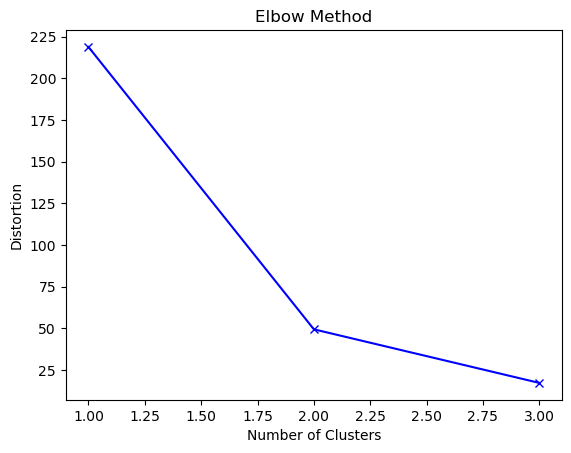

In [56]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

distortions = []
K = range(1, 4)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data)
    distortions.append(kmeanModel.inertia_)

plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


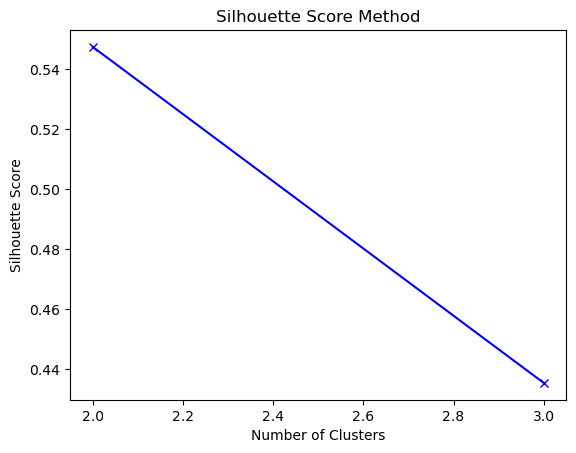

In [58]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
K = range(2, 4)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    labels = kmeanModel.fit_predict(data)
    silhouette_scores.append(silhouette_score(data, labels))

plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.show()


/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


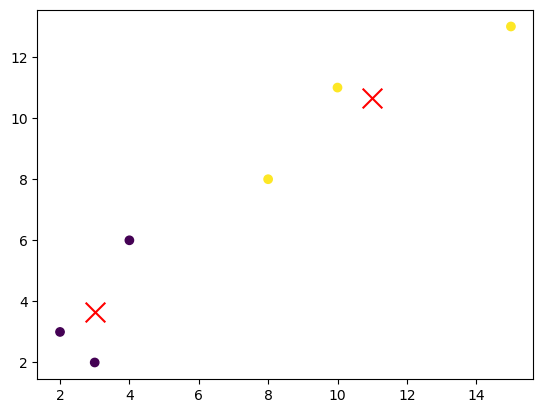

In [59]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Example data as a NumPy array
data = np.array([[2, 3], [4, 6], [8, 8], [3, 2], [10, 11], [15, 13]])

# Convert the data to a Pandas DataFrame
df = pd.DataFrame(data, columns=['X', 'Y'])

# Number of clusters
k = 2

# Create and fit KMeans model
kmeans = KMeans(n_clusters=k)
kmeans.fit(df)

# Get cluster labels and centers
labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

# Visualize the clusters
plt.scatter(df['X'], df['Y'], c=labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=200)
plt.show()


In [60]:
df

,X,Y
0,2,3
1,4,6
2,8,8
3,3,2
4,10,11
5,15,13


In [1]:
def jaccard_similarity(set_a, set_b):
    """Compute the Jaccard Similarity between two sets."""
    intersection = len(set_a.intersection(set_b))
    union = len(set_a.union(set_b))
    return intersection / union if union != 0 else 0.0

# Example usage:
set1 = {"a", "b", "c"}
set2 = {"b", "c", "d"}
similarity = jaccard_similarity(set1, set2)
print(f"Jaccard Similarity: {similarity}")


Jaccard Similarity: 0.5


In [2]:
def hamming_distance(s1, s2):
    if len(s1) != len(s2):
        raise ValueError("Strings must be of the same length")
    return sum(c1 != c2 for c1, c2 in zip(s1, s2))
def hamming_similarity(s1, s2):
    distance = hamming_distance(s1, s2)
    return (len(s1) - distance) / len(s1)
    
s1 = "karolin"
s2 = "kathrin"

print(hamming_distance(s1, s2))
print(hamming_similarity(s1, s2))


3
0.5714285714285714


In [3]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances

def davies_bouldin_index(X, labels):
    n_cluster = len(np.bincount(labels))
    cluster_k = [X[labels == k] for k in range(n_cluster)]
    centroids = [np.mean(k, axis=0) for k in cluster_k]

    # Calculate the scatter (S_i) for each cluster
    S = [np.mean(pairwise_distances(cluster_k[i], [centroids[i]])) for i in range(n_cluster)]
    
    # Calculate the pairwise centroid distances (d(c_i, c_j))
    centroid_distances = pairwise_distances(centroids)
    np.fill_diagonal(centroid_distances, float('inf'))

    # Calculate the similarity (R_ij) between each pair of clusters
    R = np.zeros((n_cluster, n_cluster))
    for i in range(n_cluster):
        for j in range(n_cluster):
            if i != j:
                R[i, j] = (S[i] + S[j]) / centroid_distances[i, j]

    # Calculate the Davies–Bouldin index
    dbi = np.mean(np.max(R, axis=1))

    return dbi

# Sample dataset and clustering
X = np.array([[1, 2], [5, 8], [1.5, 1.8], [8, 8], [1, 0.6], [9, 11]])
kmeans = KMeans(n_clusters=2).fit(X)
labels = kmeans.labels_

# Calculate DBI
dbi_value = davies_bouldin_index(X, labels)
print(f"Davies–Bouldin index: {dbi_value}")


Davies–Bouldin index: 0.28269818402984925


/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [4]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np

# Sample data
data, _ = make_blobs(n_samples=300, centers=3, random_state=42)

# Sample clustering
kmeans = KMeans(n_clusters=3)
labels = kmeans.fit_predict(data)

# Silhouette coefficient
sil_coeff = silhouette_score(data, labels)
print(f"Silhouette Coefficient: {sil_coeff}")

# Dunn Index
def dunn_index(X, labels):
    # pairwise distance matrix
    distance_matrix = np.linalg.norm(X[:, np.newaxis] - X, axis=2)

    # For each cluster, compute the intra-cluster distance
    intra_cluster_distances = np.array([
        np.max(distance_matrix[labels == i][:, labels == i])
        for i in np.unique(labels)
    ])

    # For each pair of clusters, compute the inter-cluster distance
    inter_cluster_distances = np.array([
        np.min(distance_matrix[labels == i][:, labels == j])
        for i in np.unique(labels)
        for j in np.unique(labels)
        if i != j
    ])

    return np.min(inter_cluster_distances) / np.max(intra_cluster_distances)

di = dunn_index(data, labels)
print(f"Dunn Index: {di}")



Silhouette Coefficient: 0.8480303059596955
Dunn Index: 0.9484430301054111


/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [6]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

# Generate some sample data
X, _ = make_blobs(n_samples=500, centers=4, random_state=42, cluster_std=1.0)

# Apply KMeans clustering
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# Calculate the overall silhouette score
silhouette_avg = silhouette_score(X, cluster_labels)
print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")

# Calculate the silhouette score for each sample
sample_silhouette_values = silhouette_samples(X, cluster_labels)


For n_clusters = 4, the average silhouette_score is : 0.7911042588289479


/home/yanboyang713/.conda/envs/project-health/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [8]:
from sklearn.metrics import adjusted_rand_score, pairwise_distances
import numpy as np

def rand_index_score(clusters_true, clusters_pred):
    """
    Compute the Rand Index between two clusterings.
    
    Parameters:
    - clusters_true : array-like, true labels
    - clusters_pred : array-like, predicted labels

    Returns:
    - ri : float, Rand Index
    """
    tp_fp = sum([len(np.where(clusters_pred == label)[0]) ** 2 for label in set(clusters_pred)])
    tp_fn = sum([len(np.where(clusters_true == label)[0]) ** 2 for label in set(clusters_true)])
    A = np.array([clusters_true == clusters_true[i] for i in range(len(clusters_true))])
    B = np.array([clusters_pred == clusters_pred[i] for i in range(len(clusters_pred))])
    tp = sum([(A[i] & B[i]).sum() for i in range(len(A))]) / 2
    fp = tp_fp / 2 - tp
    fn = tp_fn / 2 - tp
    tn = len(clusters_pred) ** 2 / 2 - tp - fp - fn
    ri = (tp + tn) / (tp + fp + fn + tn)
    return ri

# Sample data
true_clusters = [0, 0, 1, 1, 2, 2]
predicted_clusters = [0, 0, 1, 2, 2, 2]

# Calculate Rand Index
ri = rand_index_score(true_clusters, predicted_clusters)
print(f"Rand Index: {ri:.4f}")

# Calculate Adjusted Rand Index using sklearn
ari = adjusted_rand_score(true_clusters, predicted_clusters)
print(f"Adjusted Rand Index: {ari:.4f}")


Rand Index: 1.0000
Adjusted Rand Index: 0.4444


In [10]:
from sklearn.metrics import precision_score, recall_score

def f_beta_score(P, R, beta=1.0):
    """
    Compute the F_beta score.

    Parameters:
    - P (float): Precision
    - R (float): Recall
    - beta (float): Weighting factor

    Returns:
    - float: F_beta score
    """
    if P + R == 0:
        return 0.0  # Handle edge case to avoid division by zero
    return (1 + beta**2) * P * R / (beta**2 * P + R)

def compute_f_beta_from_labels(true_labels, predicted_labels, beta=1.0):
    """
    Compute the F_beta score from true and predicted labels.

    Parameters:
    - true_labels (list): Ground truth labels
    - predicted_labels (list): Predicted labels from clustering or classification
    - beta (float): Weighting factor

    Returns:
    - float: F_beta score
    """
    P = precision_score(true_labels, predicted_labels, average='macro')
    R = recall_score(true_labels, predicted_labels, average='macro')
    return f_beta_score(P, R, beta)

# Example usage:
true_labels = [1, 0, 1, 2, 2, 0]
predicted_labels = [1, 1, 1, 2, 0, 0]
beta = 2

print(compute_f_beta_from_labels(true_labels, predicted_labels, beta))


0.6770833333333334


In [12]:
from itertools import combinations
from math import sqrt

def fowlkes_mallows_index(labels_true, labels_pred):
    """
    Compute the Fowlkes-Mallows index for two clusterings.

    :param labels_true: List of ground truth cluster labels
    :param labels_pred: List of predicted cluster labels
    :return: Fowlkes-Mallows index
    """
    if len(labels_true) != len(labels_pred):
        raise ValueError("Both lists must have the same length")

    # Compute pairs
    pairs_true = {(i, j) for i in range(len(labels_true)) for j in range(i+1, len(labels_true)) if labels_true[i] == labels_true[j]}
    pairs_pred = {(i, j) for i in range(len(labels_pred)) for j in range(i+1, len(labels_pred)) if labels_pred[i] == labels_pred[j]}

    TP = len(pairs_true & pairs_pred)
    FP = len(pairs_pred - pairs_true)
    FN = len(pairs_true - pairs_pred)

    if TP == 0:
        return 0.0
    else:
        return TP / sqrt((TP + FP) * (TP + FN))

# Example usage
labels_true = [0, 0, 1, 1, 2, 2]
labels_pred = [0, 0, 1, 2, 2, 2]
print(fowlkes_mallows_index(labels_true, labels_pred))  # This should print the FM index for the given clusterings


0.5773502691896258


In [13]:
import numpy as np
from sklearn.metrics import confusion_matrix

def mutual_information(U, V):
    # Compute the joint probability matrix
    joint_prob = confusion_matrix(U, V) / float(len(U))
    
    # Compute the marginal probabilities
    prob_U = np.sum(joint_prob, axis=1)
    prob_V = np.sum(joint_prob, axis=0)
    
    # Compute mutual information
    MI = 0.0
    for i in range(len(prob_U)):
        for j in range(len(prob_V)):
            if joint_prob[i][j] > 0:
                MI += joint_prob[i][j] * np.log2(joint_prob[i][j] / (prob_U[i] * prob_V[j]))
    return MI

def entropy(labels):
    prob = np.bincount(labels) / float(len(labels))
    return -np.sum(p * np.log2(p) for p in prob if p > 0)

def normalized_mutual_information(U, V):
    MI = mutual_information(U, V)
    entropy_U = entropy(U)
    entropy_V = entropy(V)
    return 2 * MI / (entropy_U + entropy_V)

# Example
true_labels = [0, 0, 1, 1, 2, 2]
cluster_labels = [0, 0, 2, 1, 2, 2]

print("MI:", mutual_information(true_labels, cluster_labels))
print("NMI:", normalized_mutual_information(true_labels, cluster_labels))


MI: 1.1258145836939113
NMI: 0.739667376800759


/tmp/ipykernel_70179/375929187.py:22: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return -np.sum(p * np.log2(p) for p in prob if p > 0)


In [278]:
!mamba install -y lightgbm


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['lightgbm']

error    libmamba Could not open lockfile '/opt/mambaforge/pkgs/cache/cache.lock'
erro

In [281]:
import pandas as pd
import csv
import os
import sys
import csv
import time
import numpy as np
import random

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#sys.path.insert(0, f"{os.path.dirname(os.getcwd())}/src")
from utils import evaluate_result
from data_imbalance_src.smote_oversampling import RandomOversampling, ADASYNOversampling, BorderlineSMOTEOversampling, SMOTEOversampling, SVMSMOTEOversampling
from data_imbalance_src.smote_oversampling import SMOTUNEDOversampling
from data_imbalance_src.dazzle import DAZZLEOversampling
from data_imbalance_src.Imbalance_Farou2022.data_generation import GANOversampling
from data_imbalance_src.random_projection import RandomProjectionOversampling

ModuleNotFoundError: No module named 'utils'